In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [33]:
# df = pd.read_csv('input_diar.tsv', sep='\t')

# start = df['start'].min()

# df['start_time'] = df['start'] - start
# df['end_time'] = df['end'] - start

# df['start_to_end'] = df['end_time'] - df['start_time']

# df

,start,end,speaker,start_time,end_time,start_to_end
0,0.497812,2.978438,SPEAKER_01,0.000000,2.480625,2.480625
1,4.328437,10.133437,SPEAKER_01,3.830625,9.635625,5.805000
2,10.268437,12.749063,SPEAKER_01,9.770625,12.251250,2.480625
3,14.082187,15.938437,SPEAKER_01,13.584375,15.440625,1.856250
4,16.056562,26.907187,SPEAKER_01,15.558750,26.409375,10.850625
...,...,...,...,...,...,...
85,396.722812,402.308438,SPEAKER_05,396.225000,401.810625,5.585625
86,402.375938,408.518438,SPEAKER_05,401.878125,408.020625,6.142500
87,408.906563,414.677813,SPEAKER_05,408.408750,414.180000,5.771250
88,416.348437,420.330938,SPEAKER_02,415.850625,419.833125,3.982500


### Print df as gantt chart form

In [29]:
df['start'] = pd.to_datetime(df['start'], unit='s').dt.time
df['end'] = pd.to_datetime(df['end'], unit='s').dt.time

df['start_time'] = pd.to_datetime(df['start_time'], unit='s').dt.time
df['end_time'] = pd.to_datetime(df['end_time'], unit='s').dt.time

df


,start,end,speaker,start_time,end_time,start_to_end
0,00:00:00.497812,00:00:02.978437,SPEAKER_01,00:00:00,00:00:02.480625,2.480625
1,00:00:04.328437,00:00:10.133437,SPEAKER_01,00:00:03.830625,00:00:09.635625,5.805000
2,00:00:10.268437,00:00:12.749062,SPEAKER_01,00:00:09.770625,00:00:12.251249,2.480625
3,00:00:14.082187,00:00:15.938437,SPEAKER_01,00:00:13.584375,00:00:15.440625,1.856250
4,00:00:16.056562,00:00:26.907187,SPEAKER_01,00:00:15.558750,00:00:26.409375,10.850625
...,...,...,...,...,...,...
85,00:06:36.722812,00:06:42.308437,SPEAKER_05,00:06:36.225000,00:06:41.810625,5.585625
86,00:06:42.375937,00:06:48.518437,SPEAKER_05,00:06:41.878125,00:06:48.020625,6.142500
87,00:06:48.906562,00:06:54.677812,SPEAKER_05,00:06:48.408750,00:06:54.180000,5.771250
88,00:06:56.348437,00:07:00.330937,SPEAKER_02,00:06:55.850625,00:06:59.833125,3.982500


In [34]:
def color(row):
  c_dict = {'SPEAKER_00':'#E64646', 'SPEAKER_01':'#E69646', 'SPEAKER_02':'#34D05C', 'SPEAKER_03':'#34D0C3', 'SPEAKER_04':'#3475D0', 'SPEAKER_05':'#D034BE'}
  # c_dict = {'SPEAKER_00':'#E64646', 'SPEAKER_01':'#E69646'}
  return c_dict[row['speaker']]
  

df['color'] = df.apply(color, axis=1)

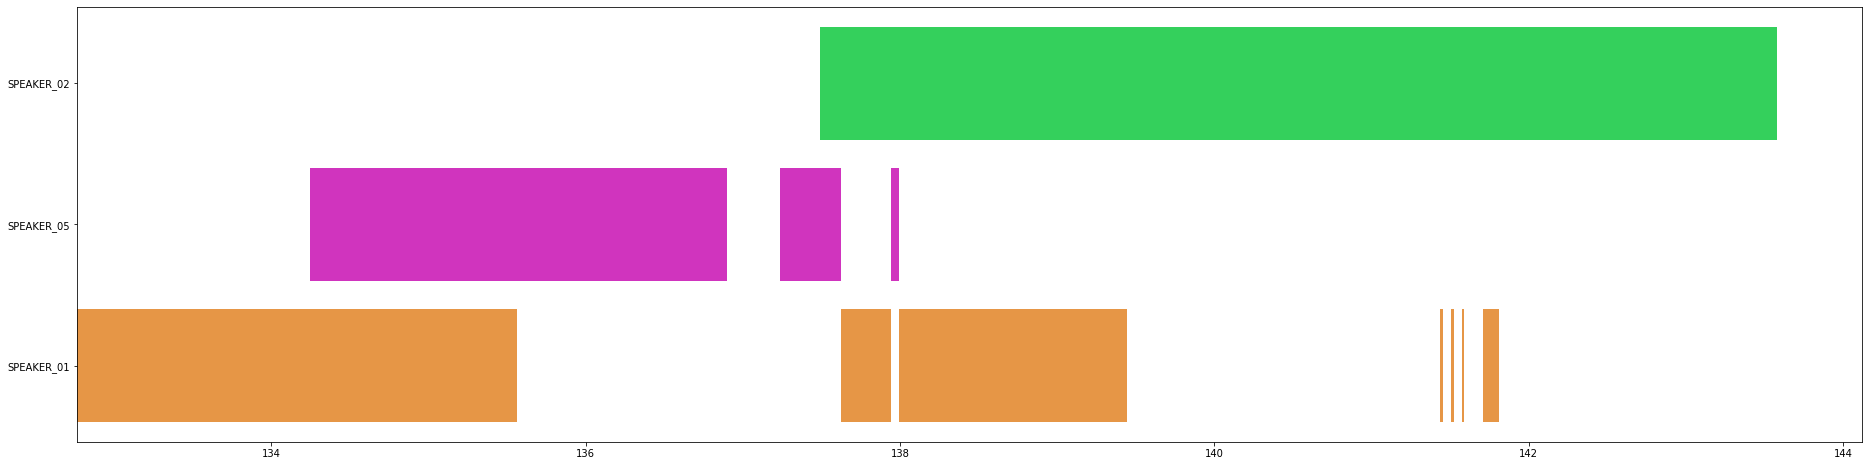

In [36]:
fig, ax = plt.subplots(1, figsize=(32, 8))

tmp_df = df[20:31]

ax.barh(tmp_df.speaker, tmp_df.start_to_end, left=tmp_df.start, color=tmp_df.color)

plt.show()

In [15]:
tmp_df

,start,end,speaker,start_time,end_time,start_to_end,color
15,00:01:19.219687,00:01:20.569687,SPEAKER_01,00:01:18.721875,00:01:20.071875,1.350000,#E69646
16,00:01:20.856562,00:01:42.524062,SPEAKER_01,00:01:20.358750,00:01:42.026250,21.667500,#E69646
17,00:01:43.199062,00:01:52.328437,SPEAKER_02,00:01:42.701250,00:01:51.830625,9.129375,#34D05C
18,00:01:52.547812,00:02:08.292187,SPEAKER_05,00:01:52.050000,00:02:07.794375,15.744375,#D034BE
19,00:02:09.709687,00:02:11.667187,SPEAKER_01,00:02:09.211875,00:02:11.169375,1.957500,#E69646
20,00:02:12.764062,00:02:15.565312,SPEAKER_01,00:02:12.266250,00:02:15.067500,2.801250,#E69646
21,00:02:14.249062,00:02:16.898437,SPEAKER_05,00:02:13.751250,00:02:16.400625,2.649375,#D034BE
22,00:02:17.235937,00:02:17.624062,SPEAKER_05,00:02:16.738125,00:02:17.126250,0.388125,#D034BE
23,00:02:17.489062,00:02:23.580937,SPEAKER_02,00:02:16.991250,00:02:23.083125,6.091875,#34D05C
24,00:02:17.624062,00:02:17.944687,SPEAKER_01,00:02:17.126250,00:02:17.446875,0.320625,#E69646
